# Multilayer perceptron Done

Class is better

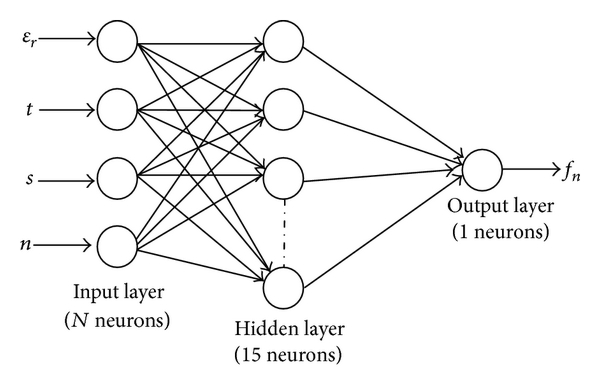

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Assim..

Se uma perceptron, calcula-se como $[\sum_{i=0}^{n} (Xi+Wi)] + b$ 2 perceptron se calculam $N_0 = [\sum_{i=0}^{n} (X_{0i}i+W_{0i})] + b_0$ e $N_1 = [\sum_{i=0}^{n} (X_{1i}i+W_{1i})] + b_1$.

Isto é...

Multiplicação de matrizes

### Desta forma...

Cada camada é uma matriz de pesos, onde cada linha representa um neorónio.

Sendo que o bias é correspondente a quantidade de neoronios

#### Função sigmoid e a derivada da sigmoid

$\sigma(x) = \frac{1}{1 + e^{-x}}$

$\sigma'(x) = \sigma(x) * (1 - \sigma(x))$

In [2]:
def sigmoid(x):
#     print(x)
    try:
        return 1 / (1 + math.exp(-x))
    except:
        print("err ",x)
        return None
    
def d_sigmoid(x):
    return x * (1-x)


sigmoid = np.vectorize(sigmoid)
d_sigmoid = np.vectorize(d_sigmoid)

# Visualização das imagens

In [3]:
def visualiza(points, valor, zero1=False):
    img = np.ones((300, 400)) 
    w = img.shape[0]
    h = img.shape[1]

    if zero1:
        for x in range(0, w):
            for y in range(0, h):
                if (predict([y/h, x/w]) > 0.5):
                    img[x][y] = 1
                else:
                    img[x][y] = 0 
    else:
        for x in range(0, w):
            for y in range(0, h):
                img[x][y] = predict([y/h, x/w])
    
    plt.imshow(img, origin='lower')
    plt.colorbar()
    for x, y in zip(points,valor):
        if y == 1:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='r', s=40)
        else:
            plt.scatter(x=x[0]*h, y=x[1]*w, c='b', s=40)
    plt.show()
    
def predict(X):    
    X = np.array([X]).T 
    tmp = net.predict(X)
    return tmp[0][0]

# Class to MLP
### Camadas

Cria uma camada com n neurons e z sinapces.

- Lembrando que os pesos são uma matriz
- Utiliza Numpy para armazenar as matrizes
- Nada de Numpy.Matrix
- A função de calcular o resultado (predict, feedforward) calcula $W \times X + B_{ias}$ 

In [4]:
class layer:
    def __init__(self, neurons, sinapces):
        self.neurons = neurons
        self.iNeurons = sinapces
        self.W = self.createLayerW(self.neurons, self.iNeurons)
        self.bias = self.createLayerW(self.neurons, 1)
        self.exit = None
        
    def createLayerW(self,nin,nout):
        tmp = []
        for i in range(nin):
            tmp.append([])
            for j in range(nout):
                tmp[i].append(random.random())
        return np.array(tmp)

    def printSharp(self):
        s = ""
        for i in range(self.iNeurons):
            s += "|"
        print(s)
        s = ""
        for i in range(self.neurons):
            s += "#"
        print(s)
        s = ""
        for i in range(len(self.bias)):
            s += "_"
        print(s)
    
    def printWB(self):
        print('W')
        print(self.W)
        print('b')
        print(self.bias)
        
        
    def add(self, W):
        if self.W.shape != W.shape:
            print("Error 1", self.W.shape, W.shape)
        self.W = self.W + W
        
    def addBias(self, W):
        if self.bias.shape != W.shape:
            print("Error 2", self.bias.shape, W.shape)
        self.bias = self.bias + W
    
    def forward(self, X):
        self.exit = self.W.dot(X)
        self.exit = self.exit + self.bias
        self.exit = sigmoid(self.exit)
    
    def getExit(self):
        return self.exit
    

# Rede neural

 Cria [entrada, hidem_layers, saida].
 - Backpropagation utiliza a técnica de Gradiente descendente como <b>Otimizer</b>
 - A métrica de avaliação neste caso é <b>Accuracy</b>
 - Atenção aos <b>hiper-parâmetros</b>
  - Learning rate
  - Otimizer
  - Accuracy

In [5]:
class neuralNetWork:
    def __init__(self, nInfo, lr = 0.5):
        self.layers = []
        nb = None
        self.lr = lr
        self.HidemLayers = []
        for n in nInfo:
            if nb is None:
                nb = n
                continue
            self.layers.append(layer(n, nb))
            nb = n
            
    def printSharp(self):
        for layer in self.layers:
            layer.printSharp()
            
    def printWB(self):
        for layer in self.layers:
            layer.printWB()
    
    def predict(self, X):
        if X.shape[1] != 1:
            print("X shape must be (n,1)!")
        self.HidemLayers = [X]
        for layer in self.layers:
            layer.forward(X)
            X = layer.getExit()
            self.HidemLayers.append(X)
        return X
    
    def backprop(self, X, y):
        Xs = self.HidemLayers
        iX = len(Xs) - 1
        layerant = None
        while iX > 0:
            layer = self.layers[iX-1]
            if iX == len(Xs) - 1:
                er = np.array([[y]]) - Xs[iX]
                e = er
            else:
                e = layerant.W.T.dot(e)

            d_y_pred = d_sigmoid(Xs[iX])

            grad = d_y_pred * e
            grad = grad * self.lr

            layer.addBias(grad)
            W_d = grad.dot(Xs[iX-1].T)

            layer.add(W_d)

            iX -= 1
            layerant = layer
    
    def train(self, x_train, y_train):
        for X, y in zip(x_train, y_train):
            X = np.array([X]).T
            self.predict(X)
            self.backprop(X,y)
            
        return X
        

# Testando com XOR
XOR ou <b>ou exclusivo</b>

In [6]:
points = [[1,0],[0,1],[0,0],[1,1]]
valor = [1,1,0,0]

In [7]:
neurons = [2,3,1]

net = neuralNetWork(neurons)
net.printSharp()

||
###
___
|||
#
_


In [8]:
for i in range(1000):
    net.train(points, valor)
    print("-------")
    mean = 0
    for p, v in zip(points, valor):
        prd = net.predict(np.array([p]).T)
        print(prd, v, p)
        if v == 1 and prd[0][0] > 0.5:
            mean += 1
        if v == 0 and prd[0][0] < 0.5:
            mean += 1
            
    mean = mean/len(points)
    
    print("Accuracy ", mean)

-------
[[0.7307184]] 1 [1, 0]
[[0.74331067]] 1 [0, 1]
[[0.7232091]] 0 [0, 0]
[[0.74809405]] 0 [1, 1]
Accuracy  0.5
-------
[[0.68228191]] 1 [1, 0]
[[0.69262155]] 1 [0, 1]
[[0.67675319]] 0 [0, 0]
[[0.69606184]] 0 [1, 1]
Accuracy  0.5
-------
[[0.63711946]] 1 [1, 0]
[[0.6446903]] 1 [0, 1]
[[0.6334554]] 0 [0, 0]
[[0.64683689]] 0 [1, 1]
Accuracy  0.5
-------
[[0.59819709]] 1 [1, 0]
[[0.60301891]] 1 [0, 1]
[[0.59610564]] 0 [0, 0]
[[0.6040798]] 0 [1, 1]
Accuracy  0.5
-------
[[0.56656204]] 1 [1, 0]
[[0.56898701]] 1 [0, 1]
[[0.56569293]] 0 [0, 0]
[[0.56922094]] 0 [1, 1]
Accuracy  0.5
-------
[[0.54181382]] 1 [1, 0]
[[0.54230212]] 1 [0, 1]
[[0.54183856]] 0 [0, 0]
[[0.54194884]] 0 [1, 1]
Accuracy  0.5
-------
[[0.52288373]] 1 [1, 0]
[[0.52187039]] 1 [0, 1]
[[0.52352902]] 0 [0, 0]
[[0.52112445]] 0 [1, 1]
Accuracy  0.5
-------
[[0.50857963]] 1 [1, 0]
[[0.50642503]] 1 [0, 1]
[[0.50963159]] 0 [0, 0]
[[0.50543458]] 0 [1, 1]
Accuracy  0.5
-------
[[0.49783699]] 1 [1, 0]
[[0.49482175]] 1 [0, 1]
[[0.4

[[0.45633293]] 1 [0, 1]
[[0.45096026]] 0 [0, 0]
[[0.46430587]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46633923]] 1 [1, 0]
[[0.45627102]] 1 [0, 1]
[[0.45063462]] 0 [0, 0]
[[0.46441085]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46645696]] 1 [1, 0]
[[0.45620927]] 1 [0, 1]
[[0.45030542]] 0 [0, 0]
[[0.46451743]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46658086]] 1 [1, 0]
[[0.45614768]] 1 [0, 1]
[[0.44997249]] 0 [0, 0]
[[0.46462566]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46671109]] 1 [1, 0]
[[0.45608626]] 1 [0, 1]
[[0.44963566]] 0 [0, 0]
[[0.46473561]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46684781]] 1 [1, 0]
[[0.45602498]] 1 [0, 1]
[[0.44929477]] 0 [0, 0]
[[0.46484734]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46699116]] 1 [1, 0]
[[0.45596384]] 1 [0, 1]
[[0.44894963]] 0 [0, 0]
[[0.46496092]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46714133]] 1 [1, 0]
[[0.45590285]] 1 [0, 1]
[[0.44860005]] 0 [0, 0]
[[0.46507641]] 0 [1, 1]
Accuracy  0.5
-------
[[0.46729847]] 1 [1, 0]
[[0.455842]] 1 [0, 1]
[[0.44824585]] 0 [0, 0]
[[0.465193

[[0.39562415]] 0 [0, 0]
[[0.48352308]] 0 [1, 1]
Accuracy  0.75
-------
[[0.50870309]] 1 [1, 0]
[[0.45296173]] 1 [0, 1]
[[0.39395178]] 0 [0, 0]
[[0.48408151]] 0 [1, 1]
Accuracy  0.75
-------
[[0.5101313]] 1 [1, 0]
[[0.45299525]] 1 [0, 1]
[[0.39223962]] 0 [0, 0]
[[0.48465059]] 0 [1, 1]
Accuracy  0.75
-------
[[0.51159679]] 1 [1, 0]
[[0.45303504]] 1 [0, 1]
[[0.39048746]] 0 [0, 0]
[[0.48523015]] 0 [1, 1]
Accuracy  0.75
-------
[[0.5131001]] 1 [1, 0]
[[0.45308139]] 1 [0, 1]
[[0.38869516]] 0 [0, 0]
[[0.48581999]] 0 [1, 1]
Accuracy  0.75
-------
[[0.51464175]] 1 [1, 0]
[[0.45313456]] 1 [0, 1]
[[0.38686263]] 0 [0, 0]
[[0.48641986]] 0 [1, 1]
Accuracy  0.75
-------
[[0.51622221]] 1 [1, 0]
[[0.45319482]] 1 [0, 1]
[[0.38498986]] 0 [0, 0]
[[0.48702948]] 0 [1, 1]
Accuracy  0.75
-------
[[0.51784195]] 1 [1, 0]
[[0.45326245]] 1 [0, 1]
[[0.3830769]] 0 [0, 0]
[[0.48764853]] 0 [1, 1]
Accuracy  0.75
-------
[[0.51950138]] 1 [1, 0]
[[0.4533377]] 1 [0, 1]
[[0.38112387]] 0 [0, 0]
[[0.48827665]] 0 [1, 1]
Accu

[[0.6938781]] 1 [1, 0]
[[0.46852694]] 1 [0, 1]
[[0.21175716]] 0 [0, 0]
[[0.5155107]] 0 [1, 1]
Accuracy  0.5
-------
[[0.69652577]] 1 [1, 0]
[[0.46862389]] 1 [0, 1]
[[0.20957625]] 0 [0, 0]
[[0.51535214]] 0 [1, 1]
Accuracy  0.5
-------
[[0.69914926]] 1 [1, 0]
[[0.46871277]] 1 [0, 1]
[[0.20742304]] 0 [0, 0]
[[0.51517982]] 0 [1, 1]
Accuracy  0.5
-------
[[0.7017481]] 1 [1, 0]
[[0.46879379]] 1 [0, 1]
[[0.20529762]] 0 [0, 0]
[[0.51499434]] 0 [1, 1]
Accuracy  0.5
-------
[[0.70432185]] 1 [1, 0]
[[0.46886715]] 1 [0, 1]
[[0.20320004]] 0 [0, 0]
[[0.51479626]] 0 [1, 1]
Accuracy  0.5
-------
[[0.70687013]] 1 [1, 0]
[[0.46893308]] 1 [0, 1]
[[0.20113035]] 0 [0, 0]
[[0.51458619]] 0 [1, 1]
Accuracy  0.5
-------
[[0.70939259]] 1 [1, 0]
[[0.46899181]] 1 [0, 1]
[[0.19908853]] 0 [0, 0]
[[0.5143647]] 0 [1, 1]
Accuracy  0.5
-------
[[0.71188891]] 1 [1, 0]
[[0.46904358]] 1 [0, 1]
[[0.19707456]] 0 [0, 0]
[[0.51413236]] 0 [1, 1]
Accuracy  0.5
-------
[[0.71435885]] 1 [1, 0]
[[0.46908864]] 1 [0, 1]
[[0.19508839

[[0.46699564]] 1 [0, 1]
[[0.11503788]] 0 [0, 0]
[[0.49410717]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82165671]] 1 [1, 0]
[[0.46696112]] 1 [0, 1]
[[0.11427921]] 0 [0, 0]
[[0.49384631]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82270726]] 1 [1, 0]
[[0.46692743]] 1 [0, 1]
[[0.11353097]] 0 [0, 0]
[[0.49358816]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82374415]] 1 [1, 0]
[[0.46689458]] 1 [0, 1]
[[0.11279296]] 0 [0, 0]
[[0.49333268]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82476757]] 1 [1, 0]
[[0.46686258]] 1 [0, 1]
[[0.11206499]] 0 [0, 0]
[[0.49307987]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82577775]] 1 [1, 0]
[[0.46683141]] 1 [0, 1]
[[0.11134689]] 0 [0, 0]
[[0.49282969]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82677489]] 1 [1, 0]
[[0.46680109]] 1 [0, 1]
[[0.11063847]] 0 [0, 0]
[[0.49258212]] 0 [1, 1]
Accuracy  0.75
-------
[[0.8277592]] 1 [1, 0]
[[0.4667716]] 1 [0, 1]
[[0.10993955]] 0 [0, 0]
[[0.49233713]] 0 [1, 1]
Accuracy  0.75
-------
[[0.82873088]] 1 [1, 0]
[[0.46674294]] 1 [0, 1]
[[0.10924996]] 0 [0, 0]
[[

[[0.47991032]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87339835]] 1 [1, 0]
[[0.46652633]] 1 [0, 1]
[[0.07741766]] 0 [0, 0]
[[0.47976114]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87382711]] 1 [1, 0]
[[0.46654855]] 1 [0, 1]
[[0.07710036]] 0 [0, 0]
[[0.47961203]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87425095]] 1 [1, 0]
[[0.46657171]] 1 [0, 1]
[[0.07678602]] 0 [0, 0]
[[0.47946296]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87466992]] 1 [1, 0]
[[0.46659583]] 1 [0, 1]
[[0.07647459]] 0 [0, 0]
[[0.47931388]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87508404]] 1 [1, 0]
[[0.46662094]] 1 [0, 1]
[[0.07616603]] 0 [0, 0]
[[0.47916474]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87549337]] 1 [1, 0]
[[0.46664705]] 1 [0, 1]
[[0.0758603]] 0 [0, 0]
[[0.4790155]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87589794]] 1 [1, 0]
[[0.46667419]] 1 [0, 1]
[[0.07555737]] 0 [0, 0]
[[0.4788661]] 0 [1, 1]
Accuracy  0.75
-------
[[0.87629778]] 1 [1, 0]
[[0.4667024]] 1 [0, 1]
[[0.07525719]] 0 [0, 0]
[[0.47871649]] 0 [1, 1]
Accuracy  0.75
-------
[[0.8

[[0.0596711]] 0 [0, 0]
[[0.46142359]] 0 [1, 1]
Accuracy  0.75
-------
[[0.8917579]] 1 [1, 0]
[[0.47893638]] 1 [0, 1]
[[0.05950647]] 0 [0, 0]
[[0.46084315]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89169732]] 1 [1, 0]
[[0.47960764]] 1 [0, 1]
[[0.05934345]] 0 [0, 0]
[[0.46023787]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89162006]] 1 [1, 0]
[[0.48031866]] 1 [0, 1]
[[0.05918204]] 0 [0, 0]
[[0.45960632]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89152525]] 1 [1, 0]
[[0.48107165]] 1 [0, 1]
[[0.05902222]] 0 [0, 0]
[[0.45894702]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89141196]] 1 [1, 0]
[[0.48186888]] 1 [0, 1]
[[0.058864]] 0 [0, 0]
[[0.4582584]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89127923]] 1 [1, 0]
[[0.48271261]] 1 [0, 1]
[[0.05870735]] 0 [0, 0]
[[0.45753882]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89112604]] 1 [1, 0]
[[0.48360509]] 1 [0, 1]
[[0.05855227]] 0 [0, 0]
[[0.45678656]] 0 [1, 1]
Accuracy  0.75
-------
[[0.89095133]] 1 [1, 0]
[[0.48454858]] 1 [0, 1]
[[0.05839873]] 0 [0, 0]
[[0.45599984]] 0 [1, 1]
Accur

[[0.32101857]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83265541]] 1 [1, 0]
[[0.65537508]] 1 [0, 1]
[[0.05402206]] 0 [0, 0]
[[0.3191044]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83205352]] 1 [1, 0]
[[0.65820393]] 1 [0, 1]
[[0.05399346]] 0 [0, 0]
[[0.31721575]] 0 [1, 1]
Accuracy  1.0
-------
[[0.8314762]] 1 [1, 0]
[[0.66100233]] 1 [0, 1]
[[0.05396054]] 0 [0, 0]
[[0.31535249]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83092331]] 1 [1, 0]
[[0.66376956]] 1 [0, 1]
[[0.05392317]] 0 [0, 0]
[[0.31351446]] 0 [1, 1]
Accuracy  1.0
-------
[[0.8303947]] 1 [1, 0]
[[0.666505]] 1 [0, 1]
[[0.05388124]] 0 [0, 0]
[[0.31170147]] 0 [1, 1]
Accuracy  1.0
-------
[[0.82989018]] 1 [1, 0]
[[0.66920812]] 1 [0, 1]
[[0.05383465]] 0 [0, 0]
[[0.30991333]] 0 [1, 1]
Accuracy  1.0
-------
[[0.82940954]] 1 [1, 0]
[[0.67187847]] 1 [0, 1]
[[0.05378332]] 0 [0, 0]
[[0.30814983]] 0 [1, 1]
Accuracy  1.0
-------
[[0.82895254]] 1 [1, 0]
[[0.67451567]] 1 [0, 1]
[[0.05372718]] 0 [0, 0]
[[0.30641071]] 0 [1, 1]
Accuracy  1.0
-------
[[0.82851891]] 

-------
[[0.83341242]] 1 [1, 0]
[[0.78996998]] 1 [0, 1]
[[0.04093241]] 0 [0, 0]
[[0.22707402]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83371984]] 1 [1, 0]
[[0.79093916]] 1 [0, 1]
[[0.04069793]] 0 [0, 0]
[[0.22632931]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83402895]] 1 [1, 0]
[[0.79189666]] 1 [0, 1]
[[0.04046383]] 0 [0, 0]
[[0.22559132]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83433961]] 1 [1, 0]
[[0.79284267]] 1 [0, 1]
[[0.04023016]] 0 [0, 0]
[[0.22485995]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83465173]] 1 [1, 0]
[[0.79377742]] 1 [0, 1]
[[0.03999697]] 0 [0, 0]
[[0.22413509]] 0 [1, 1]
Accuracy  1.0
-------
[[0.8349652]] 1 [1, 0]
[[0.79470111]] 1 [0, 1]
[[0.03976429]] 0 [0, 0]
[[0.22341664]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83527991]] 1 [1, 0]
[[0.79561394]] 1 [0, 1]
[[0.03953217]] 0 [0, 0]
[[0.2227045]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83559578]] 1 [1, 0]
[[0.79651609]] 1 [0, 1]
[[0.03930065]] 0 [0, 0]
[[0.22199857]] 0 [1, 1]
Accuracy  1.0
-------
[[0.83591269]] 1 [1, 0]
[[0.79740777]] 1 [0, 1]
[[

[[0.18433772]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85730999]] 1 [1, 0]
[[0.84126999]] 1 [0, 1]
[[0.02577311]] 0 [0, 0]
[[0.18391154]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85759151]] 1 [1, 0]
[[0.84172671]] 1 [0, 1]
[[0.02562332]] 0 [0, 0]
[[0.18348796]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85787196]] 1 [1, 0]
[[0.84217984]] 1 [0, 1]
[[0.0254747]] 0 [0, 0]
[[0.18306694]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85815136]] 1 [1, 0]
[[0.84262943]] 1 [0, 1]
[[0.02532725]] 0 [0, 0]
[[0.18264846]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85842969]] 1 [1, 0]
[[0.84307551]] 1 [0, 1]
[[0.02518094]] 0 [0, 0]
[[0.1822325]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85870696]] 1 [1, 0]
[[0.84351814]] 1 [0, 1]
[[0.02503578]] 0 [0, 0]
[[0.18181902]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85898317]] 1 [1, 0]
[[0.84395736]] 1 [0, 1]
[[0.02489177]] 0 [0, 0]
[[0.18140802]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85925831]] 1 [1, 0]
[[0.8443932]] 1 [0, 1]
[[0.02474888]] 0 [0, 0]
[[0.18099945]] 0 [1, 1]
Accuracy  1.0
-------
[[0.85953239]

[[0.86842451]] 1 [0, 1]
[[0.01710722]] 0 [0, 0]
[[0.1573478]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87621031]] 1 [1, 0]
[[0.86869611]] 1 [0, 1]
[[0.0170256]] 0 [0, 0]
[[0.15706769]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87641576]] 1 [1, 0]
[[0.86896615]] 1 [0, 1]
[[0.01694459]] 0 [0, 0]
[[0.15678892]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87662039]] 1 [1, 0]
[[0.86923463]] 1 [0, 1]
[[0.0168642]] 0 [0, 0]
[[0.15651148]] 0 [1, 1]
Accuracy  1.0
-------
[[0.8768242]] 1 [1, 0]
[[0.86950157]] 1 [0, 1]
[[0.01678441]] 0 [0, 0]
[[0.15623535]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87702719]] 1 [1, 0]
[[0.86976698]] 1 [0, 1]
[[0.01670523]] 0 [0, 0]
[[0.15596052]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87722937]] 1 [1, 0]
[[0.87003088]] 1 [0, 1]
[[0.01662664]] 0 [0, 0]
[[0.15568699]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87743073]] 1 [1, 0]
[[0.87029329]] 1 [0, 1]
[[0.01654864]] 0 [0, 0]
[[0.15541474]] 0 [1, 1]
Accuracy  1.0
-------
[[0.87763129]] 1 [1, 0]
[[0.87055421]] 1 [0, 1]
[[0.01647123]] 0 [0, 0]
[[0.15514377

[[0.01232741]] 0 [0, 0]
[[0.13927175]] 0 [1, 1]
Accuracy  1.0
-------
[[0.88974587]] 1 [1, 0]
[[0.88560807]] 1 [0, 1]
[[0.01227981]] 0 [0, 0]
[[0.13907041]] 0 [1, 1]
Accuracy  1.0
-------
[[0.88989939]] 1 [1, 0]
[[0.88579102]] 1 [0, 1]
[[0.01223253]] 0 [0, 0]
[[0.13886987]] 0 [1, 1]
Accuracy  1.0
-------
[[0.89005236]] 1 [1, 0]
[[0.88597314]] 1 [0, 1]
[[0.01218555]] 0 [0, 0]
[[0.13867012]] 0 [1, 1]
Accuracy  1.0
-------
[[0.89020478]] 1 [1, 0]
[[0.88615444]] 1 [0, 1]
[[0.01213888]] 0 [0, 0]
[[0.13847114]] 0 [1, 1]
Accuracy  1.0
-------
[[0.89035666]] 1 [1, 0]
[[0.88633492]] 1 [0, 1]
[[0.01209251]] 0 [0, 0]
[[0.13827295]] 0 [1, 1]
Accuracy  1.0
-------
[[0.89050798]] 1 [1, 0]
[[0.88651459]] 1 [0, 1]
[[0.01204644]] 0 [0, 0]
[[0.13807554]] 0 [1, 1]
Accuracy  1.0
-------
[[0.89065877]] 1 [1, 0]
[[0.88669345]] 1 [0, 1]
[[0.01200067]] 0 [0, 0]
[[0.13787889]] 0 [1, 1]
Accuracy  1.0
-------
[[0.89080901]] 1 [1, 0]
[[0.88687152]] 1 [0, 1]
[[0.0119552]] 0 [0, 0]
[[0.13768301]] 0 [1, 1]
Accuracy 

[[0.00943758]] 0 [0, 0]
[[0.12593283]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90001881]] 1 [1, 0]
[[0.89750867]] 1 [0, 1]
[[0.00940755]] 0 [0, 0]
[[0.12578022]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90013741]] 1 [1, 0]
[[0.89764242]] 1 [0, 1]
[[0.00937768]] 0 [0, 0]
[[0.12562813]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90025563]] 1 [1, 0]
[[0.89777567]] 1 [0, 1]
[[0.00934798]] 0 [0, 0]
[[0.12547654]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90037347]] 1 [1, 0]
[[0.89790842]] 1 [0, 1]
[[0.00931844]] 0 [0, 0]
[[0.12532546]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90049094]] 1 [1, 0]
[[0.89804068]] 1 [0, 1]
[[0.00928907]] 0 [0, 0]
[[0.12517489]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90060804]] 1 [1, 0]
[[0.89817245]] 1 [0, 1]
[[0.00925986]] 0 [0, 0]
[[0.12502481]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90072477]] 1 [1, 0]
[[0.89830374]] 1 [0, 1]
[[0.00923081]] 0 [0, 0]
[[0.12487524]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90084113]] 1 [1, 0]
[[0.89843454]] 1 [0, 1]
[[0.00920192]] 0 [0, 0]
[[0.12472616]] 0 [1, 1]
Accuracy

[[0.11574501]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90797836]] 1 [1, 0]
[[0.90633364]] 1 [0, 1]
[[0.0075549]] 0 [0, 0]
[[0.11562437]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90807308]] 1 [1, 0]
[[0.90643696]] 1 [0, 1]
[[0.00753463]] 0 [0, 0]
[[0.11550408]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90816753]] 1 [1, 0]
[[0.90653995]] 1 [0, 1]
[[0.00751446]] 0 [0, 0]
[[0.11538414]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90826171]] 1 [1, 0]
[[0.90664262]] 1 [0, 1]
[[0.00749439]] 0 [0, 0]
[[0.11526455]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90835563]] 1 [1, 0]
[[0.90674496]] 1 [0, 1]
[[0.00747441]] 0 [0, 0]
[[0.1151453]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90844929]] 1 [1, 0]
[[0.90684698]] 1 [0, 1]
[[0.00745453]] 0 [0, 0]
[[0.1150264]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90854269]] 1 [1, 0]
[[0.90694868]] 1 [0, 1]
[[0.00743474]] 0 [0, 0]
[[0.11490785]] 0 [1, 1]
Accuracy  1.0
-------
[[0.90863582]] 1 [1, 0]
[[0.90705006]] 1 [0, 1]
[[0.00741505]] 0 [0, 0]
[[0.11478963]] 0 [1, 1]
Accuracy  1.0
-------
[[0.9087287]]

# Visualizando

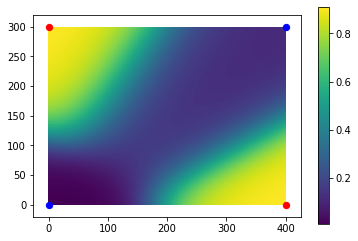

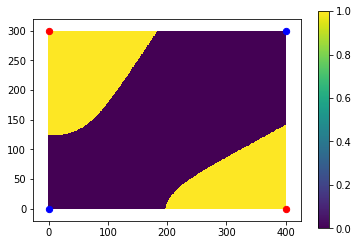

In [9]:
visualiza(points, valor)
visualiza(points, valor, True)

In [10]:
# para

# Criando amostras aleatórias

In [11]:
def createSamples(list1, list2, label, bias = False):
    random.shuffle(list1)
    random.shuffle(list2)
    tmp = []
    for p1, p2 in zip(list1, list2):
        if bias:
            tmp.append([p1, p2, 1, label])
        else:
            tmp.append([p1, p2, label])
    return tmp

In [12]:
qte_sample = 80
itemsx = []
itemsy = []

for i in range(int(qte_sample/4)):
    itemsy.append(random.random()*3)
    itemsx.append(random.random()*10)
    
    itemsy.append(random.random()*3+7)
    itemsx.append(random.random()*10+20)
    
    itemsy.append(random.random()*4+3)
    itemsx.append(random.random()*10)
    
    itemsy.append(random.random()*4+3)
    itemsx.append(random.random()*10+20)
    
    itemsy.append(random.random()*3)
    itemsx.append(random.random()*10+5)
    
    itemsy.append(random.random()*2+7)
    itemsx.append(random.random()*10+15)

rosas = createSamples(itemsx, itemsy, 0, True)

In [13]:
qte_sample = 90
itemsx = []
itemsy = []

for i in range(qte_sample):
    itemsy.append(random.random()*4+3)
    itemsx.append(random.random()*10+10)
    
violetas = createSamples(itemsx, itemsy, 1, True)

In [14]:
points = np.array(rosas + violetas)

np.take(points,np.random.permutation(points.shape[0]),axis=0,out=points)

# 2 is bias
valor = points[:,3]
points = points[:,[0,1]]
# Normalizando
points[:,0] *= 1/30
points[:,1] *= 1/10


In [15]:
# Test


predict(np.array([1,1]))

0.11339718842148946

# Outros exemplos

In [16]:
neurons = [2,100,1]

net = neuralNetWork(neurons)
net.printSharp()

||
####################################################################################################
____________________________________________________________________________________________________
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
#
_


In [17]:
print(points)
print(valor)

[[0.64101828 0.80779926]
 [0.12749565 0.95419613]
 [0.95298722 0.50146736]
 [0.75589227 0.79168541]
 [0.29276472 0.72086421]
 [0.62987612 0.17669148]
 [0.77090974 0.27346889]
 [0.31203856 0.20811768]
 [0.23782611 0.69638872]
 [0.67423351 0.78307245]
 [0.61372706 0.61099105]
 [0.44461511 0.48726135]
 [0.0257483  0.25385935]
 [0.32774467 0.48585103]
 [0.83284031 0.47049266]
 [0.40300838 0.34041042]
 [0.58798735 0.98757304]
 [0.38240507 0.45221099]
 [0.54096654 0.34918308]
 [0.38370783 0.51345337]
 [0.48718341 0.56147556]
 [0.30596418 0.94699207]
 [0.63598051 0.52282705]
 [0.97967892 0.29245364]
 [0.09057626 0.21956108]
 [0.50788812 0.49671276]
 [0.79585886 0.66962087]
 [0.32138424 0.88060122]
 [0.47035186 0.61683388]
 [0.28394589 0.22039461]
 [0.4618982  0.60177019]
 [0.43093776 0.45603117]
 [0.53456828 0.3531938 ]
 [0.54040978 0.42987088]
 [0.06378665 0.24948727]
 [0.42981153 0.43204756]
 [0.74596098 0.90000275]
 [0.67518846 0.55088432]
 [0.50255473 0.43719517]
 [0.464176   0.61867663]


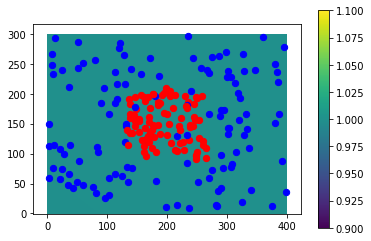

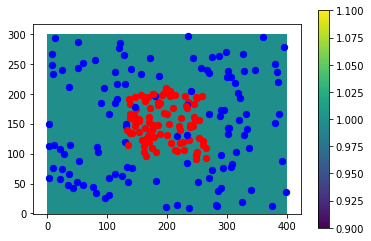

In [18]:
visualiza(points, valor)
visualiza(points, valor, True)

In [19]:
for i in range(1000):
    net.train(points, valor)
    print("------- ",i)
    mean = 0
    for p, v in zip(points, valor):
        prd = net.predict(np.array([p]).T)
#         print(prd, v, p)
        if v == 1 and prd[0][0] > 0.5:
            mean += 1
        if v == 0 and prd[0][0] < 0.5:
            mean += 1
            
    mean = mean/len(points)
    
    print("Accuracy ", mean)

-------  0
Accuracy  0.43333333333333335
-------  1
Accuracy  0.48095238095238096
-------  2
Accuracy  0.5142857142857142
-------  3
Accuracy  0.5666666666666667
-------  4
Accuracy  0.5714285714285714
-------  5
Accuracy  0.5714285714285714
-------  6
Accuracy  0.5714285714285714
-------  7
Accuracy  0.5714285714285714
-------  8
Accuracy  0.5714285714285714
-------  9
Accuracy  0.5714285714285714
-------  10
Accuracy  0.5714285714285714
-------  11
Accuracy  0.5714285714285714
-------  12
Accuracy  0.5714285714285714
-------  13
Accuracy  0.5714285714285714
-------  14
Accuracy  0.5714285714285714
-------  15
Accuracy  0.5714285714285714
-------  16
Accuracy  0.5714285714285714
-------  17
Accuracy  0.5714285714285714
-------  18
Accuracy  0.5714285714285714
-------  19
Accuracy  0.5714285714285714
-------  20
Accuracy  0.5714285714285714
-------  21
Accuracy  0.5714285714285714
-------  22
Accuracy  0.5714285714285714
-------  23
Accuracy  0.5714285714285714
-------  24
Accuracy  0.

Accuracy  0.9238095238095239
-------  200
Accuracy  0.9238095238095239
-------  201
Accuracy  0.9238095238095239
-------  202
Accuracy  0.9238095238095239
-------  203
Accuracy  0.9238095238095239
-------  204
Accuracy  0.9238095238095239
-------  205
Accuracy  0.9238095238095239
-------  206
Accuracy  0.9238095238095239
-------  207
Accuracy  0.9238095238095239
-------  208
Accuracy  0.9238095238095239
-------  209
Accuracy  0.9238095238095239
-------  210
Accuracy  0.9238095238095239
-------  211
Accuracy  0.919047619047619
-------  212
Accuracy  0.919047619047619
-------  213
Accuracy  0.919047619047619
-------  214
Accuracy  0.919047619047619
-------  215
Accuracy  0.9238095238095239
-------  216
Accuracy  0.9238095238095239
-------  217
Accuracy  0.9238095238095239
-------  218
Accuracy  0.9238095238095239
-------  219
Accuracy  0.9238095238095239
-------  220
Accuracy  0.9238095238095239
-------  221
Accuracy  0.9238095238095239
-------  222
Accuracy  0.9238095238095239
-------  

Accuracy  0.9238095238095239
-------  398
Accuracy  0.9238095238095239
-------  399
Accuracy  0.919047619047619
-------  400
Accuracy  0.919047619047619
-------  401
Accuracy  0.919047619047619
-------  402
Accuracy  0.919047619047619
-------  403
Accuracy  0.919047619047619
-------  404
Accuracy  0.919047619047619
-------  405
Accuracy  0.919047619047619
-------  406
Accuracy  0.919047619047619
-------  407
Accuracy  0.919047619047619
-------  408
Accuracy  0.919047619047619
-------  409
Accuracy  0.919047619047619
-------  410
Accuracy  0.919047619047619
-------  411
Accuracy  0.919047619047619
-------  412
Accuracy  0.919047619047619
-------  413
Accuracy  0.919047619047619
-------  414
Accuracy  0.919047619047619
-------  415
Accuracy  0.919047619047619
-------  416
Accuracy  0.919047619047619
-------  417
Accuracy  0.919047619047619
-------  418
Accuracy  0.9142857142857143
-------  419
Accuracy  0.9142857142857143
-------  420
Accuracy  0.9142857142857143
-------  421
Accuracy  0

Accuracy  0.8809523809523809
-------  600
Accuracy  0.8761904761904762
-------  601
Accuracy  0.861904761904762
-------  602
Accuracy  0.8571428571428571
-------  603
Accuracy  0.8571428571428571
-------  604
Accuracy  0.8761904761904762
-------  605
Accuracy  0.861904761904762
-------  606
Accuracy  0.8666666666666667
-------  607
Accuracy  0.8666666666666667
-------  608
Accuracy  0.8666666666666667
-------  609
Accuracy  0.8666666666666667
-------  610
Accuracy  0.8666666666666667
-------  611
Accuracy  0.8666666666666667
-------  612
Accuracy  0.861904761904762
-------  613
Accuracy  0.861904761904762
-------  614
Accuracy  0.861904761904762
-------  615
Accuracy  0.861904761904762
-------  616
Accuracy  0.861904761904762
-------  617
Accuracy  0.861904761904762
-------  618
Accuracy  0.861904761904762
-------  619
Accuracy  0.861904761904762
-------  620
Accuracy  0.861904761904762
-------  621
Accuracy  0.861904761904762
-------  622
Accuracy  0.861904761904762
-------  623
Accur

Accuracy  0.9
-------  798
Accuracy  0.9095238095238095
-------  799
Accuracy  0.8857142857142857
-------  800
Accuracy  0.8809523809523809
-------  801
Accuracy  0.8904761904761904
-------  802
Accuracy  0.8809523809523809
-------  803
Accuracy  0.8761904761904762
-------  804
Accuracy  0.861904761904762
-------  805
Accuracy  0.8523809523809524
-------  806
Accuracy  0.8476190476190476
-------  807
Accuracy  0.8095238095238095
-------  808
Accuracy  0.8428571428571429
-------  809
Accuracy  0.861904761904762
-------  810
Accuracy  0.8476190476190476
-------  811
Accuracy  0.8476190476190476
-------  812
Accuracy  0.819047619047619
-------  813
Accuracy  0.8333333333333334
-------  814
Accuracy  0.819047619047619
-------  815
Accuracy  0.8285714285714286
-------  816
Accuracy  0.8238095238095238
-------  817
Accuracy  0.861904761904762
-------  818
Accuracy  0.8380952380952381
-------  819
Accuracy  0.8523809523809524
-------  820
Accuracy  0.8571428571428571
-------  821
Accuracy  0.

Accuracy  0.9380952380952381
-------  999
Accuracy  0.9380952380952381


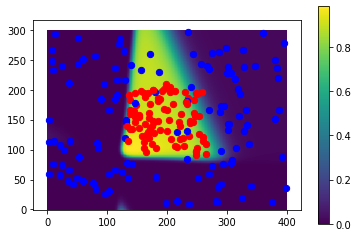

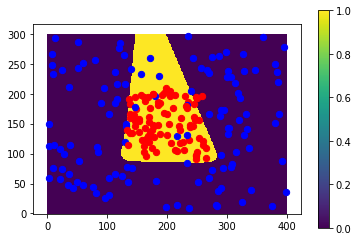

In [20]:
visualiza(points, valor)
visualiza(points, valor, True)